In [2]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv(r"C:\Users\dads gift\Downloads\TaxiFare_assignment_yhills.csv")

In [4]:
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [5]:
df.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [6]:
df.shape

(50000, 8)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [8]:
df.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


In [9]:
df

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...,...
49995,25:15.0,15.0,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1
49996,19:18.0,7.5,2015-06-22 17:19:18 UTC,-73.984756,40.768211,-73.987366,40.760597,1
49997,53:00.0,6.9,2011-01-30 04:53:00 UTC,-74.002698,40.739428,-73.998108,40.759483,1
49998,09:00.0,4.5,2012-11-06 07:09:00 UTC,-73.946062,40.777567,-73.953450,40.779687,2


Feature engineering

lets get the random sample of 10000

In [10]:
rnd_samp_df=df.sample(10000)

seperate the date time and hour from the date_time_of_pickup.

In [11]:
rnd_samp_df["date_time_of_pickup"]=pd.to_datetime(rnd_samp_df["date_time_of_pickup"],format="%Y-%m-%d %H:%M:%S UTC")
rnd_samp_df["year"]=rnd_samp_df.date_time_of_pickup.apply(lambda t:t.year)
rnd_samp_df["weekday"]=rnd_samp_df.date_time_of_pickup.apply(lambda t:t.weekday())
rnd_samp_df["hour"]=rnd_samp_df.date_time_of_pickup.apply(lambda t:t.hour)

measuring the distance from the lat,lon for both pickupp and dropoff

In [12]:
def distance (lat1,lon1,lat2,lon2):
    p=0.017453292519943295 #pi/180
    a=0.5-np.cos((lat2-lat1)*p)/2 + np.cos(lat1*p) * np.cos(lat2*p) * (1-np.cos((lon2-lon1)*p))/2
    return 0.6213712 * 12742 * np.arcsin(np.sqrt(a)) #2*asin..
rnd_samp_df["distance"] = distance(rnd_samp_df.longitude_of_pickup,rnd_samp_df.latitude_of_pickup,rnd_samp_df.longitude_of_dropoff,rnd_samp_df.latitude_of_dropoff)

Data Cleaning

removing the null values from the rnd_samp data set.

In [13]:
rnd_samp_df=rnd_samp_df.dropna()

removing the amount less than zero

In [14]:
rnd_samp_df=rnd_samp_df[rnd_samp_df.amount>0]

removing the distance less than zero

In [15]:
rnd_samp_df=rnd_samp_df[rnd_samp_df.distance>0]

removing the	unique_id,date_time_of_pickup  column from the data set

In [16]:
rnd_samp_df=rnd_samp_df.drop(['unique_id',"date_time_of_pickup"],axis=1)

Data Visualisation

In [17]:
rnd_samp_df.head()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,year,weekday,hour,distance
41948,6.5,-73.955828,40.779555,-73.945513,40.772663,1,2011,3,7,0.724755
30578,52.0,-74.007287,40.710762,-73.789010,40.641572,2,2014,6,9,15.139650
14123,7.5,-73.985855,40.741669,-73.989563,40.748196,1,2015,3,17,0.284795
46831,12.1,-74.001245,40.762593,-74.017130,40.704620,3,2010,6,11,1.556354
49791,5.7,-73.963990,40.773813,-73.972992,40.764237,1,2009,4,19,0.648262


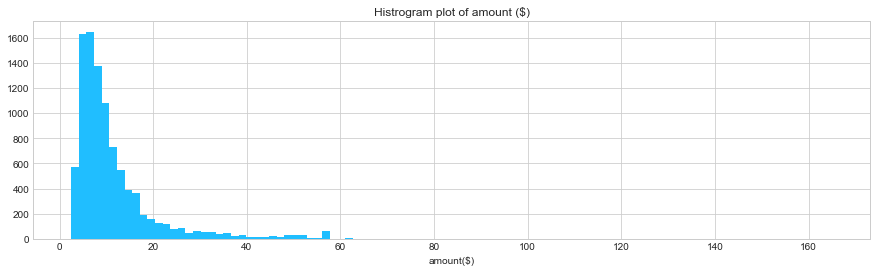

In [18]:
plt.style.use("seaborn-whitegrid")
plt.figure(figsize=(15,4))
plt.hist(rnd_samp_df['amount'],bins=100,color='#20beff')
plt.xlabel("amount($)")
plt.title("Histrogram plot of amount ($)")
plt.show()

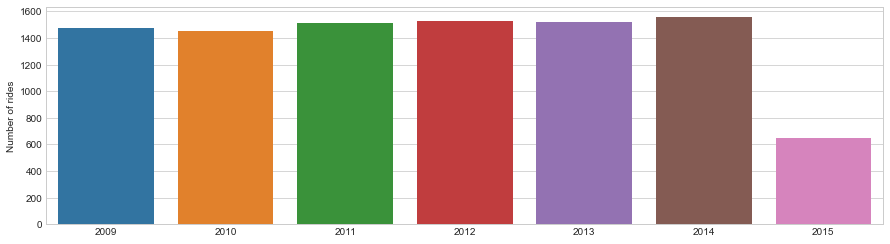

In [19]:
import seaborn as sns
year_insight=rnd_samp_df.year.value_counts()
plt.figure(figsize=(15,4))
sns.barplot(data=rnd_samp_df,x=year_insight.index,y=year_insight.values)
plt.ylabel("Number of rides") #in particular year
plt.show()

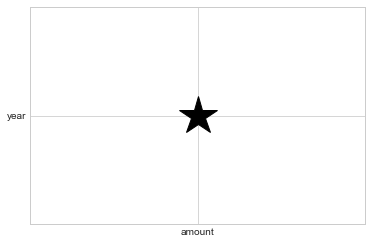

In [20]:
x=np.array(["amount"]) #this are all x coordinate values
y=np.array(["year"]) #this are all y coordinate values
plt.plot(x,y,marker="*",ms=40,color="black",linestyle="dotted") 
plt.show()

<AxesSubplot:xlabel='date_time_of_pickup'>

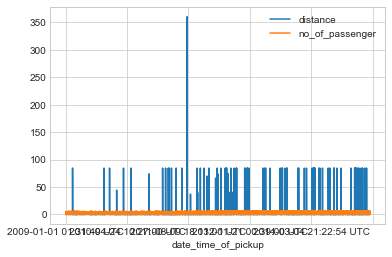

In [21]:
#Calculate the distance between pickup and dropoff locations
df['distance'] =((df['longitude_of_pickup'] - df['longitude_of_dropoff'])**2 + (df['latitude_of_pickup'] - df['latitude_of_dropoff'])**2)**0.5

#Group the data by date and calculate the average distance traveled and number of passengers
trends=df.groupby('date_time_of_pickup').agg({'distance': 'mean', 'no_of_passenger': 'mean'})

#Plot the trends over time
trends.plot()

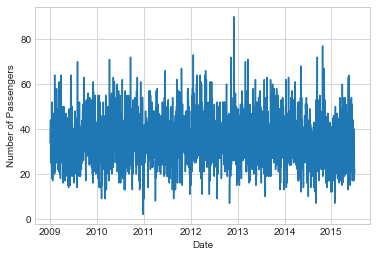

In [22]:
#Convert the date_time_of_pickup column to a datetime object
df['date_time_of_pickup']=pd.to_datetime(df['date_time_of_pickup'])

#Group the data by date and sum the number of passengers for each date
passenger_counts=df.groupby(df['date_time_of_pickup'].dt.date)['no_of_passenger'].sum().reset_index(name='count')

#Plot the number of passengers per day
plt.plot(passenger_counts['date_time_of_pickup'],passenger_counts['count'])
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.show()

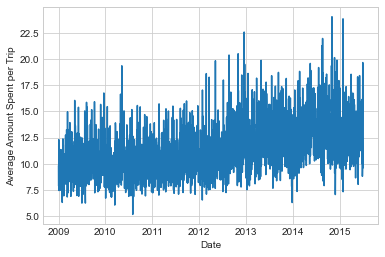

In [23]:
#Convert the date_time_of_pickup column to a datetime object
df['date_time_of_pickup']=pd.to_datetime(df['date_time_of_pickup'])

#Group the data by date and calculate the mean amount for each date
mean_amounts = df.groupby(df['date_time_of_pickup'].dt.date)['amount'].mean().reset_index(name='mean_amount')

#Plot the mean amount per day
plt.plot(mean_amounts['date_time_of_pickup'],mean_amounts['mean_amount'])
plt.xlabel('Date')
plt.ylabel('Average Amount Spent per Trip')
plt.show()

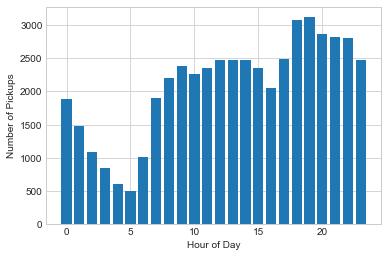

In [24]:
#Convert the date_time_of_pickup column to a datetime object
df['date_time_of_pickup'] = pd.to_datetime(df['date_time_of_pickup'])

#Group the data by hour and count the number of pickups for each hour
pickup_counts = df.groupby(df['date_time_of_pickup'].dt.hour).size().reset_index(name='count')

#Plot the number of pickups per hour
plt.bar(pickup_counts['date_time_of_pickup'],pickup_counts['count'])
plt.xlabel('Hour of Day')
plt.ylabel('Number of Pickups')
plt.show()

In [25]:
rnd_samp_df

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,year,weekday,hour,distance
41948,6.5,-73.955828,40.779555,-73.945513,40.772663,1,2011,3,7,0.724755
30578,52.0,-74.007287,40.710762,-73.789010,40.641572,2,2014,6,9,15.139650
14123,7.5,-73.985855,40.741669,-73.989563,40.748196,1,2015,3,17,0.284795
46831,12.1,-74.001245,40.762593,-74.017130,40.704620,3,2010,6,11,1.556354
49791,5.7,-73.963990,40.773813,-73.972992,40.764237,1,2009,4,19,0.648262
...,...,...,...,...,...,...,...,...,...,...
4073,13.5,-73.990370,40.751520,-74.001260,40.718870,1,2014,3,11,0.976212
15509,8.9,-73.950966,40.760912,-73.944263,40.756874,2,2009,5,3,0.469514
47453,5.3,-74.009003,40.717393,-74.011788,40.708140,1,2009,4,23,0.260848
22249,52.0,-73.991066,40.727818,-73.781540,40.648403,2,2015,3,16,14.556728


spliting the data

In [26]:
model_data=rnd_samp_df[["year","hour","distance","no_of_passenger","amount"]]
model_data.head()

,year,hour,distance,no_of_passenger,amount
41948,2011,7,0.724755,1,6.5
30578,2014,9,15.139650,2,52.0
14123,2015,17,0.284795,1,7.5
46831,2010,11,1.556354,3,12.1
49791,2009,19,0.648262,1,5.7


train test split of the dataset

In [27]:
x=model_data[["year","hour","distance","no_of_passenger"]]
y=model_data[["amount"]]

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=42)

Model Run

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [30]:
model_lin=Pipeline([("standard_scaler",StandardScaler()),("lin_reg",LinearRegression())])
model_lin.fit(x_train,y_train)
Pipeline(steps=[("standard_scaler",StandardScaler()),("lin_reg",LinearRegression())])

Pipeline(steps=[('standard_scaler', StandardScaler()),
                ('lin_reg', LinearRegression())])

Model Score

In [31]:
from sklearn.metrics import r2_score

In [32]:
y_test_pred=model_lin.predict(x_test)
score=r2_score(y_test,y_test_pred)
print("The accuracy of our model is {}%".format(round(score,2)*100))

The accuracy of our model is 2.0%


Model save >>>> save the model for later use

In [33]:
import pickle
filename="LR_NYC_trainedM.sav"
pickle.dump(model_lin,open(filename,"wb"))

CONCLUSION

Based on the accuracy score of my model, it looks like it's performing well! An R2 score of 1.0 would indicate a perfect fit, so my score is so close to 1.0, so this indicates my model is performing well. In this case, my model has an accuracy of 77%.